# Analize Adults dataset. Basic analysis of variables dependence on income and building some models to predict 

# Loading data

In [1]:
import pandas as pd
import numpy as np

In [2]:
adult = pd.read_csv('adult.csv')

In [3]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print(adult.columns, 'Shape:', adult.shape)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') Shape: (48842, 15)


# Data eksploration and analize

### Target variable:
- Income
### Predictor variable
- age
- workclass
- fnlwgt
- education
- educational-num
- marital-status
- occupation
- relationship
- race
- gender
- capital-gain
- capital-loss
- hours-per-week
- native-country	

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Scatter plot of age on hours per week

In [6]:
adult.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19741,38,Private,364782,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
43084,53,Local-gov,192982,Masters,14,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,38,United-States,>50K
46337,18,Private,174394,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K
16830,28,Private,184831,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
29382,77,Private,142646,7th-8th,4,Widowed,Priv-house-serv,Unmarried,White,Female,0,0,23,United-States,<=50K


<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

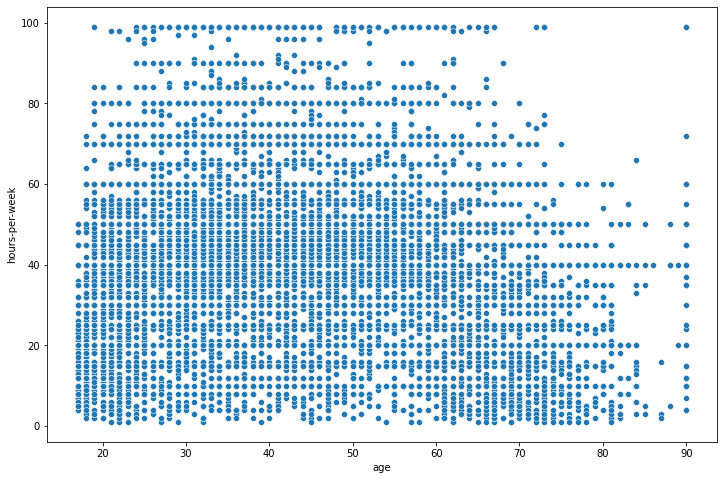

In [7]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=adult['age'], y=adult['hours-per-week'])

### Some Histograms to define which variables is valuable for analize

In [8]:
adult.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25956,37,Local-gov,144322,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,43,United-States,<=50K
6476,47,Private,78954,11th,7,Divorced,Sales,Unmarried,White,Female,0,0,28,United-States,<=50K
47196,28,Private,120475,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
23637,44,Local-gov,254134,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,Black,Male,0,0,40,United-States,<=50K
25292,37,Private,248445,HS-grad,9,Divorced,Handlers-cleaners,Other-relative,White,Male,0,0,40,El-Salvador,<=50K


<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

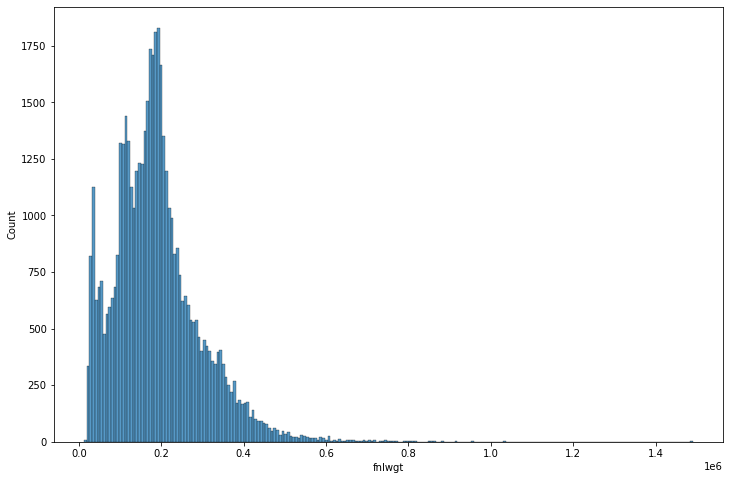

In [9]:
plt.figure(figsize=(12, 8))
sns.histplot(adult['fnlwgt'])

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

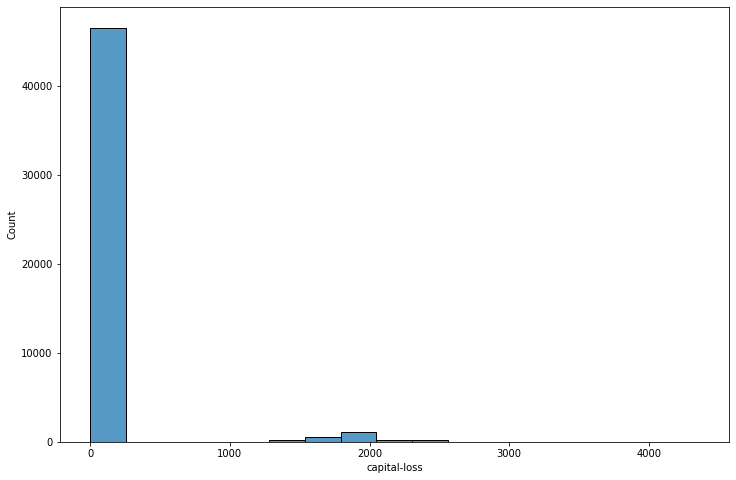

In [10]:
plt.figure(figsize=(12, 8))
sns.histplot(adult['capital-loss'])

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

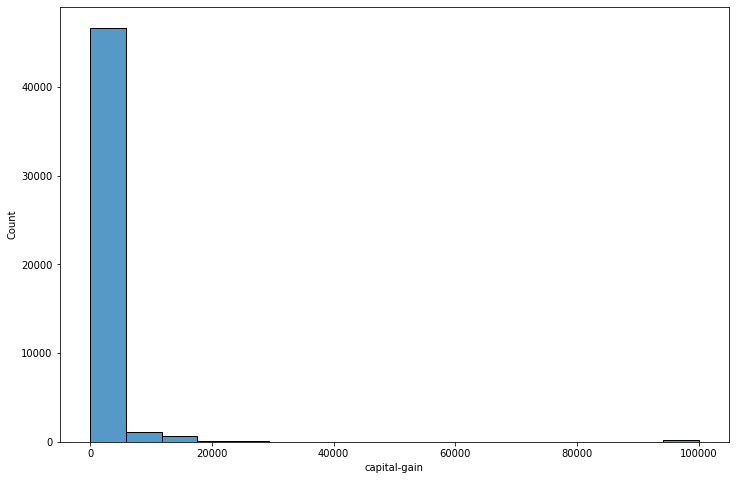

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(adult['capital-gain'])

<AxesSubplot:xlabel='age', ylabel='Count'>

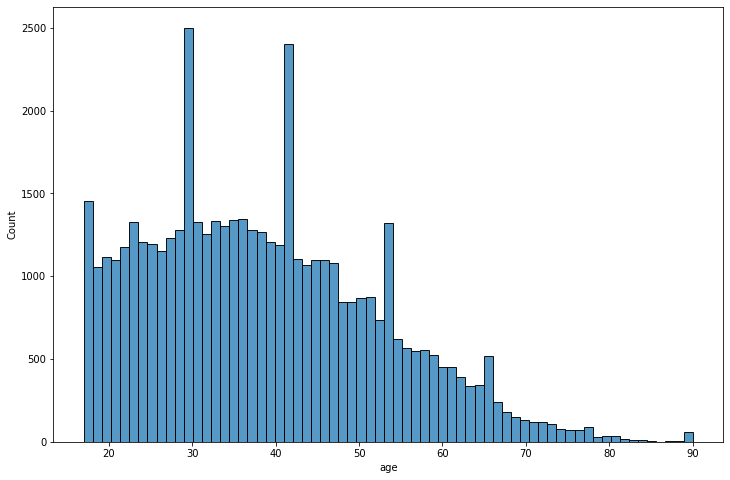

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(adult['age'])

<AxesSubplot:xlabel='race', ylabel='Count'>

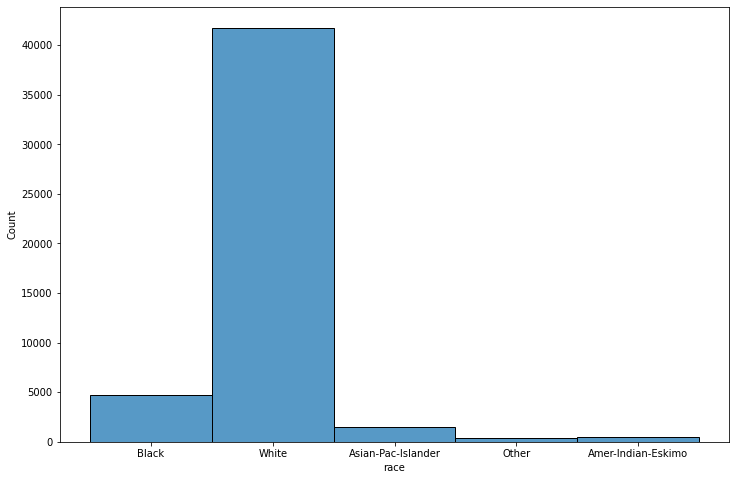

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(adult['race'])

<AxesSubplot:xlabel='gender', ylabel='Count'>

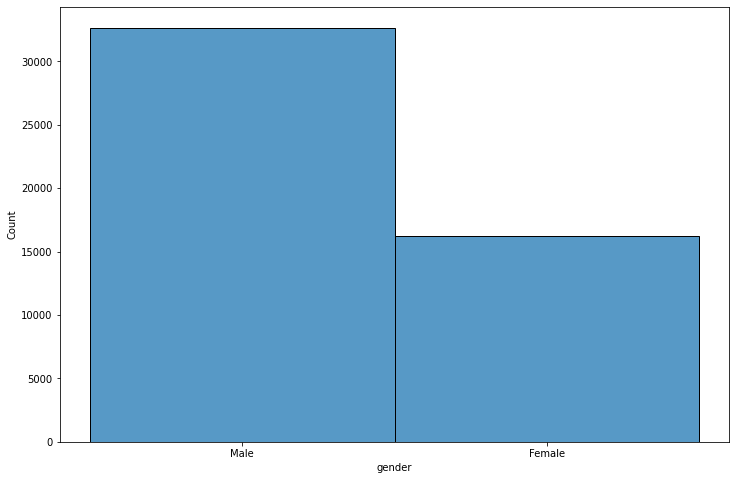

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(adult['gender'])

<AxesSubplot:xlabel='workclass', ylabel='Count'>

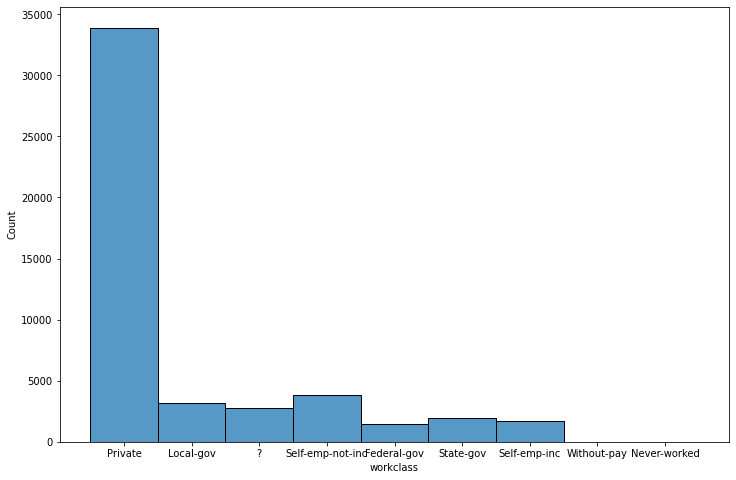

In [15]:
plt.figure(figsize=(12, 8))
sns.histplot(adult['workclass'])

<AxesSubplot:xlabel='relationship', ylabel='Count'>

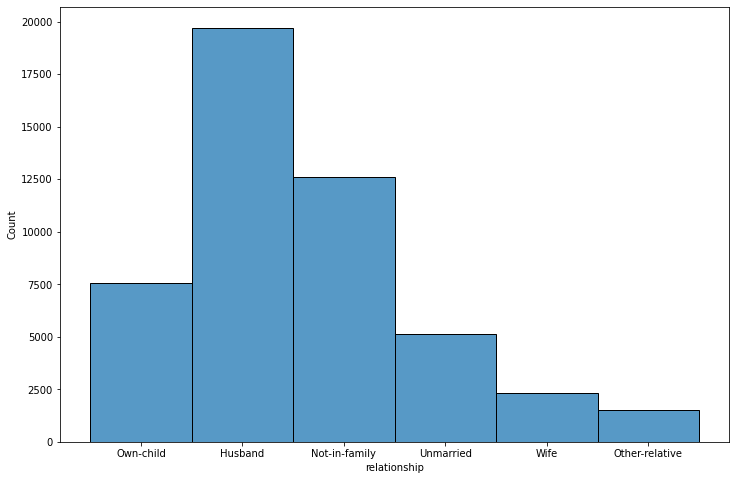

In [16]:
plt.figure(figsize=(12, 8))
sns.histplot(adult['relationship'])

<AxesSubplot:xlabel='income', ylabel='Count'>

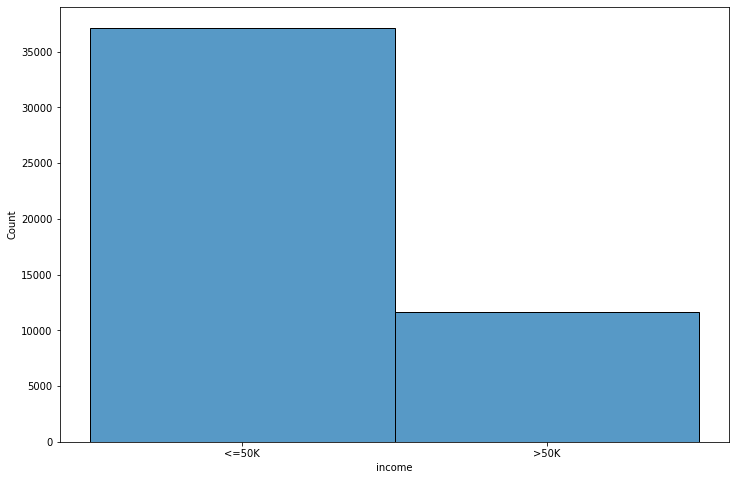

In [17]:
plt.figure(figsize=(12, 8))
sns.histplot(adult['income'])

In [18]:
adult.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
33128,32,Private,95885,11th,7,Never-married,Craft-repair,Not-in-family,Amer-Indian-Eskimo,Male,13550,0,60,United-States,>50K
27507,27,Local-gov,92431,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,2231,40,United-States,>50K
5722,59,Self-emp-not-inc,198145,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,>50K
8572,35,Private,151322,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,55,United-States,>50K
21370,53,Private,121441,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K


In [19]:
adult['hours-per-week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [20]:
adult['workclass'].describe()

count       48842
unique          9
top       Private
freq        33906
Name: workclass, dtype: object

In [21]:
adult['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [22]:
adult['native-country'].describe()	

count             48842
unique               42
top       United-States
freq              43832
Name: native-country, dtype: object

### Bar plot showing the dependecne of income on specific variables

In [23]:
adult.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
35399,44,Private,249332,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Ecuador,<=50K
36265,36,Private,374983,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
2883,47,Private,127303,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
48340,55,Private,183580,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,38,United-States,<=50K
41870,46,Private,128460,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

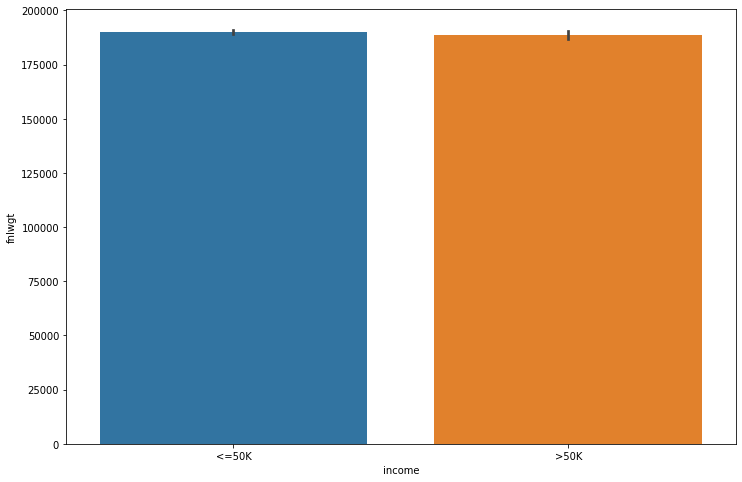

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x=adult.income, y=adult.fnlwgt)

<AxesSubplot:xlabel='income', ylabel='educational-num'>

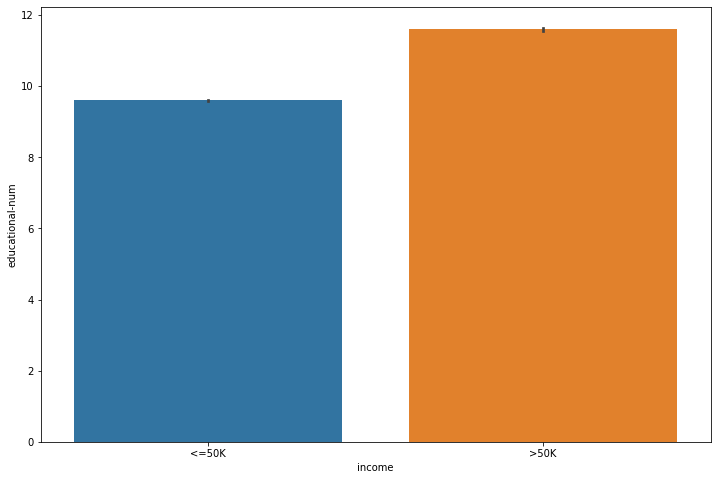

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x=adult.income, y=adult['educational-num'])

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

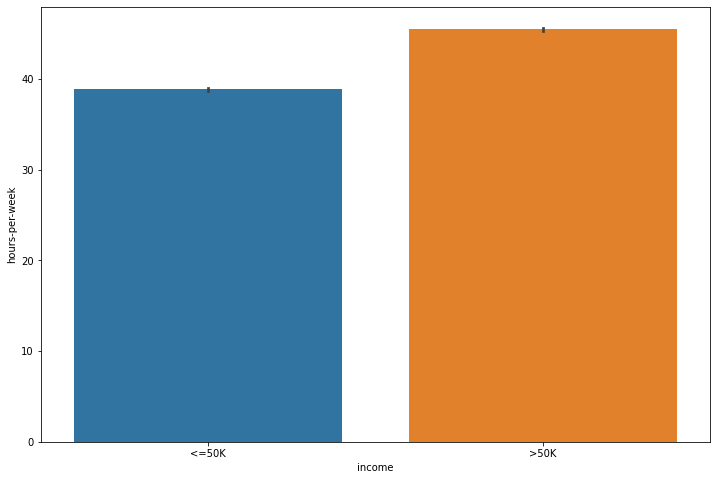

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x=adult['income'], y=adult['hours-per-week'])

### Bar plot showing the dependecne of gender on specific variables

In [27]:
adult.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
34003,17,Private,140027,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,25,United-States,<=50K
31701,57,Self-emp-inc,106103,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,60,United-States,>50K
25150,33,Private,149726,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
44275,42,Self-emp-not-inc,178780,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
24268,30,Private,196396,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='gender', ylabel='fnlwgt'>

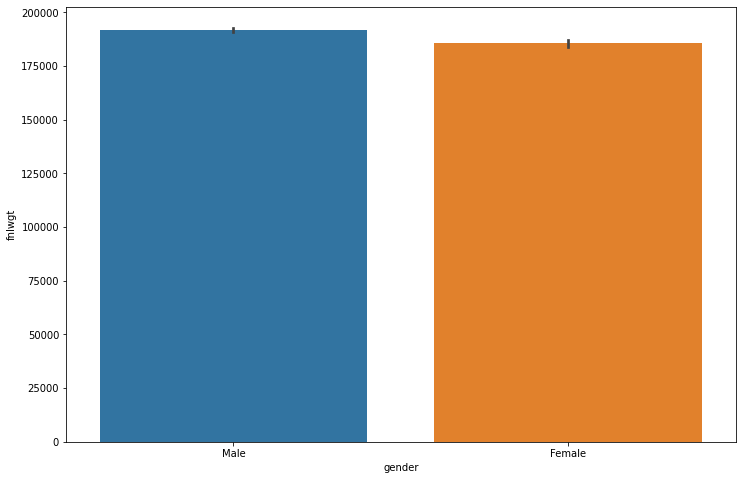

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x=adult.gender, y=adult.fnlwgt)

<AxesSubplot:xlabel='gender', ylabel='educational-num'>

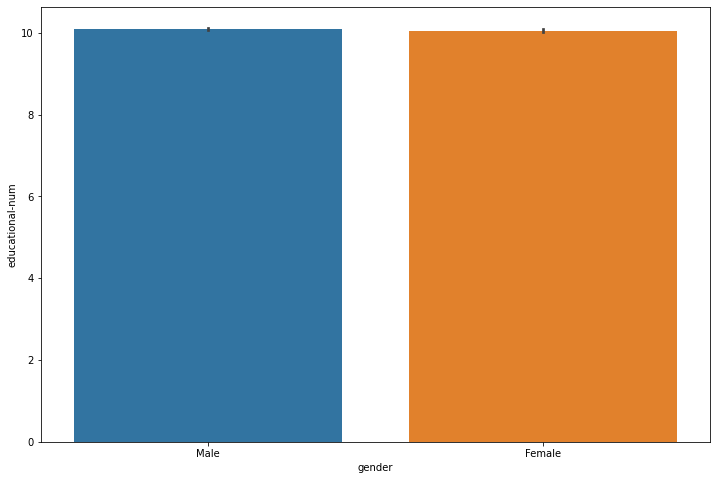

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x=adult['gender'], y=adult['educational-num'])

<AxesSubplot:xlabel='gender', ylabel='hours-per-week'>

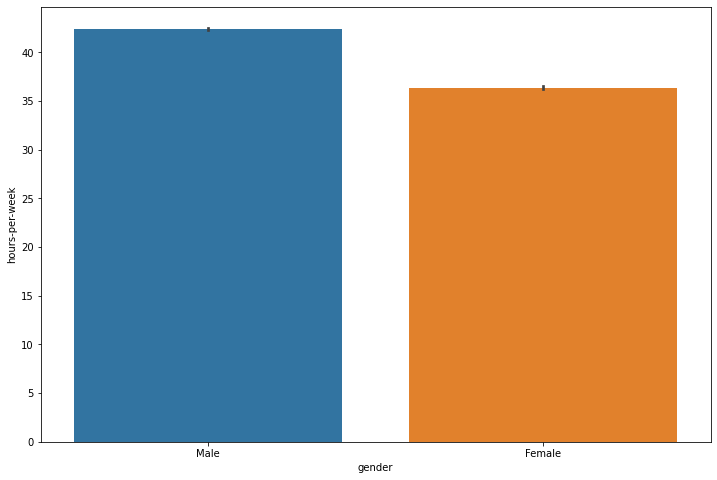

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x=adult['gender'], y=adult['hours-per-week'])

### Bar plot showing the dependecne of race on specific variables

In [31]:
adult.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
45988,38,Private,22245,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3923,46,Private,180532,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
16062,54,Private,311551,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Male,0,0,60,United-States,<=50K
6407,31,Private,101345,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
27982,67,Self-emp-inc,411007,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,15831,0,40,United-States,>50K


<AxesSubplot:xlabel='race', ylabel='fnlwgt'>

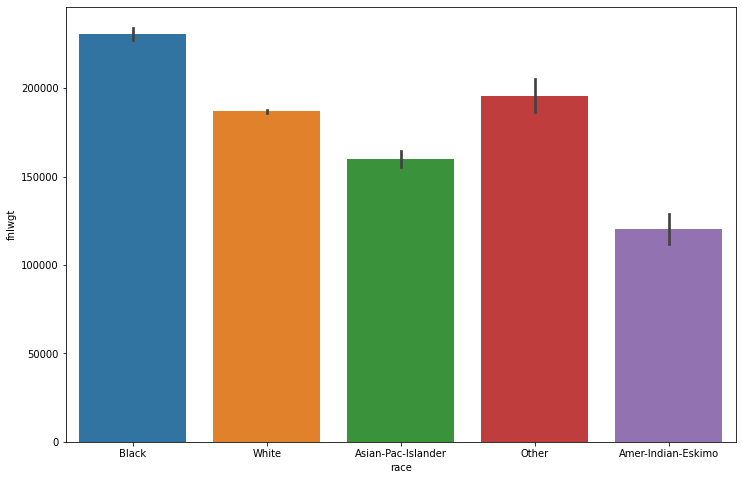

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x=adult.race, y=adult.fnlwgt)

<AxesSubplot:xlabel='race', ylabel='hours-per-week'>

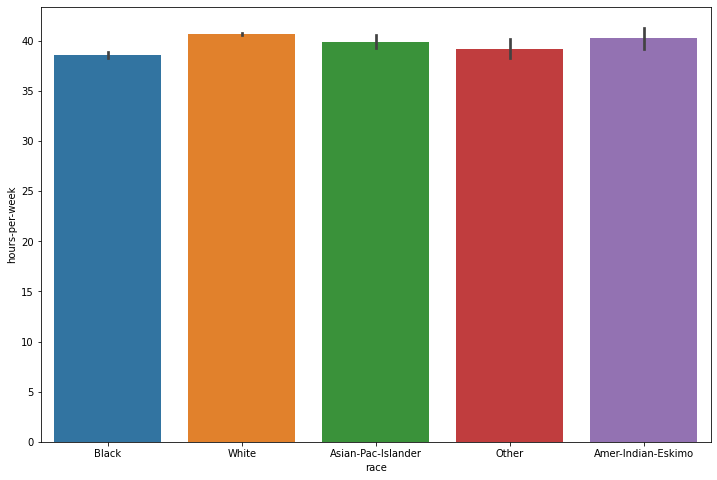

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(x=adult['race'], y=adult['hours-per-week'])

<AxesSubplot:xlabel='race', ylabel='educational-num'>

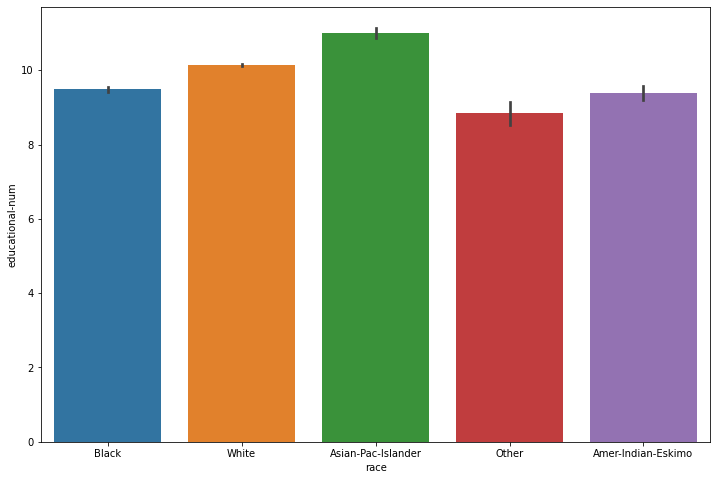

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(x=adult['race'], y=adult['educational-num'])

### Building Models with some of most inportant data

In [35]:
data = adult.copy()
data.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
22867,33,Self-emp-inc,40444,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
13072,31,Federal-gov,103651,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States,>50K
8004,40,Private,162098,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
9481,48,Private,208662,HS-grad,9,Divorced,Adm-clerical,Not-in-family,Black,Female,0,0,37,United-States,<=50K
25127,23,Private,363219,Some-college,10,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,6,United-States,<=50K


### Data normalizing

In [36]:
data['income'].replace({'>50K' : 1, '<=50K' : 0}, inplace=True)

In [37]:
data['gender'].replace({'Male' : 1, 'Female' : 0}, inplace=True)

In [38]:
data.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
3930,28,Private,424340,Some-college,10,Never-married,Adm-clerical,Own-child,Black,1,0,0,40,United-States,0
15593,51,Local-gov,133963,HS-grad,9,Separated,Adm-clerical,Not-in-family,White,0,0,0,35,?,0
18313,34,Private,229732,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,40,United-States,0
48201,32,Private,173998,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,0,0,0,60,United-States,0
16908,38,Self-emp-not-inc,267556,HS-grad,9,Married-civ-spouse,Sales,Husband,White,1,0,0,64,United-States,0


In [39]:
print(f'Min = {data.age.min()}, Max = {data.age.max()}, type = {data.age.dtype}')
data.loc[:,'age'] = data.loc[:,'age'] / 100
print(f'Min = {data.age.min()}, Max = {data.age.max()}, type = {data.age.dtype}')

Min = 17, Max = 90, type = int64
Min = 0.17, Max = 0.9, type = float64


In [40]:
print(f"Min = {data['educational-num'].min()}, Max = {data['educational-num'].max()}, type = {data.age.dtype}")
data.loc[:,'educational-num'] = data.loc[:,'educational-num'] / 100
print(f"Min = {data['educational-num'].min()}, Max = {data['educational-num'].max()}, type = {data.age.dtype}")

Min = 1, Max = 16, type = float64
Min = 0.01, Max = 0.16, type = float64


In [41]:
print(f"Min = {data['hours-per-week'].min()}, Max = {data['hours-per-week'].max()}, type = {data.age.dtype}")
data.loc[:,'hours-per-week'] = data.loc[:,'hours-per-week'] / 100
print(f"Min = {data['hours-per-week'].min()}, Max = {data['hours-per-week'].max()}, type = {data.age.dtype}")

Min = 1, Max = 99, type = float64
Min = 0.01, Max = 0.99, type = float64


In [42]:
data.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
44180,0.33,Local-gov,300681,HS-grad,0.09,Never-married,Other-service,Not-in-family,Black,1,0,0,0.4,United-States,0
32781,0.52,Private,178983,Doctorate,0.16,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,0.4,?,1
47413,0.27,Local-gov,289039,Some-college,0.10,Never-married,Protective-serv,Unmarried,Asian-Pac-Islander,0,0,0,0.4,United-States,0
6281,0.27,Private,190303,HS-grad,0.09,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,0.4,United-States,0
13786,0.53,Private,92475,Some-college,0.10,Never-married,Adm-clerical,Other-relative,White,0,0,0,0.4,United-States,0


In [43]:
data[['age', 'educational-num', 'gender', 'hours-per-week']]


,age,educational-num,gender,hours-per-week
0,0.25,0.07,1,0.40
1,0.38,0.09,1,0.50
2,0.28,0.12,1,0.40
3,0.44,0.10,1,0.40
4,0.18,0.10,0,0.30
...,...,...,...,...
48837,0.27,0.12,0,0.38
48838,0.40,0.09,1,0.40
48839,0.58,0.09,0,0.40
48840,0.22,0.09,1,0.20


In [44]:
data.income

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [47]:
X = data[['age', 'educational-num', 'gender', 'hours-per-week']]
y = data['income']

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [48]:
print(f'Logistic Regression = {np.average(cross_val_score(LogisticRegression(), X, y, cv=3))}')

Logistic Regression = 0.7954629588128759


In [49]:
print(f'Random Forest = {np.average(cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv = 3))}')

Random Forest = 0.7906515453088145


In [50]:
print(f'Support Vector Machine = {np.average(cross_val_score(SVC(), X, y, cv = 3))}')

Support Vector Machine = 0.8088121401968832


(39073, 4) (39073,) (9769, 4) (9769,)
Epoch 1/50
1222/1222 [==============================] - 5s 3ms/step - loss: 0.5540 - accuracy: 0.7513 - val_loss: 0.5104 - val_accuracy: 0.7624
Epoch 2/50
1222/1222 [==============================] - 4s 3ms/step - loss: 0.4935 - accuracy: 0.7603 - val_loss: 0.4664 - val_accuracy: 0.7624
Epoch 3/50
1222/1222 [==============================] - 3s 3ms/step - loss: 0.4617 - accuracy: 0.7603 - val_loss: 0.4447 - val_accuracy: 0.7624
Epoch 4/50
1222/1222 [==============================] - 4s 3ms/step - loss: 0.4446 - accuracy: 0.7690 - val_loss: 0.4335 - val_accuracy: 0.7966
Epoch 5/50
1222/1222 [==============================] - 4s 3ms/step - loss: 0.4331 - accuracy: 0.7933 - val_loss: 0.4227 - val_accuracy: 0.8026
Epoch 6/50
1222/1222 [==============================] - 4s 3ms/step - loss: 0.4267 - accuracy: 0.7971 - val_loss: 0.4181 - val_accuracy: 0.8012
Epoch 7/50
1222/1222 [==============================] - 4s 4ms/step - loss: 0.4231 - accuracy: 0.7

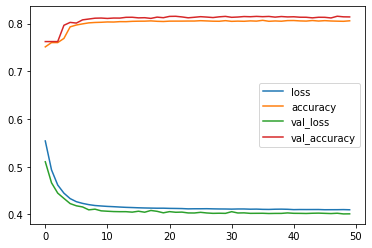

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(4,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs=50
)

history_to_plot = pd.DataFrame(history.history)
history_to_plot.plot()

print('')
print(f'Simple Neural Network = {model.evaluate(X_test, y_test)}')

### Every models have around 80% accuracy. But Neural Network and achieved best accuracy 81%. To achieve better accuracy it can be necessary to take more variables such as race, occupation etc. but first this data must be cleaned and converted to numeric

### Missing values are marked as ?

In [53]:
def print_unique(data, print_non_numeric = False, from_columns = [], missing_value = '?'):
    if len(from_columns) == 0:
        for column in data:
            missing_count = data[column][data[column] == '?'].shape[0]
            if print_non_numeric:
                if data[column].dtype == 'object':
                    print(f'Column name = {column}, Length of unique data = {data[column].unique().shape[0]}, Column type = {data[column].dtype}, Amount of missing values ({missing_value}) = {missing_count}')
            else: 
                print(f'Column name = {column}, Length of unique data = {data[column].unique().shape[0]}, Column type = {data[column].dtype}, Amount of missing values ({missing_value}) = {missing_count}')
    
    else:
        for column in from_columns:
            if print_non_numeric:
                if data[column].dtype == 'object':
                    print(f'Column name = {column}, Length of unique data = {data[column].unique().shape[0]}, Column type = {data[column].dtype}, Amount of missing values ({missing_value}) = {missing_count}')
            else: 
                print(f'Column name = {column}, Length of unique data = {data[column].unique().shape[0]}, Column type = {data[column].dtype}, Amount of missing values ({missing_value}) = {missing_count}')


In [54]:
print_unique(adult, False)

Column name = age, Length of unique data = 74, Column type = int64, Amount of missing values (?) = 0
Column name = workclass, Length of unique data = 9, Column type = object, Amount of missing values (?) = 2799
Column name = fnlwgt, Length of unique data = 28523, Column type = int64, Amount of missing values (?) = 0
Column name = education, Length of unique data = 16, Column type = object, Amount of missing values (?) = 0
Column name = educational-num, Length of unique data = 16, Column type = int64, Amount of missing values (?) = 0
Column name = marital-status, Length of unique data = 7, Column type = object, Amount of missing values (?) = 0
Column name = occupation, Length of unique data = 15, Column type = object, Amount of missing values (?) = 2809
Column name = relationship, Length of unique data = 6, Column type = object, Amount of missing values (?) = 0
Column name = race, Length of unique data = 5, Column type = object, Amount of missing values (?) = 0
Column name = gender, Len

In [55]:
print_unique(adult, True)

Column name = workclass, Length of unique data = 9, Column type = object, Amount of missing values (?) = 2799
Column name = education, Length of unique data = 16, Column type = object, Amount of missing values (?) = 0
Column name = marital-status, Length of unique data = 7, Column type = object, Amount of missing values (?) = 0
Column name = occupation, Length of unique data = 15, Column type = object, Amount of missing values (?) = 2809
Column name = relationship, Length of unique data = 6, Column type = object, Amount of missing values (?) = 0
Column name = race, Length of unique data = 5, Column type = object, Amount of missing values (?) = 0
Column name = gender, Length of unique data = 2, Column type = object, Amount of missing values (?) = 0
Column name = native-country, Length of unique data = 42, Column type = object, Amount of missing values (?) = 857
Column name = income, Length of unique data = 2, Column type = object, Amount of missing values (?) = 0


In [56]:
percent_missing = adult['workclass'][adult['workclass'] == '?'].shape[0] / adult.shape[0]
print(f'Percent missing data = {str(round((percent_missing * 100), 2))}%')

Percent missing data = 5.73%


In [57]:
percent_missing = adult['occupation'][adult['occupation'] == '?'].shape[0] / adult.shape[0]
print(f'Percent missing data = {str(round((percent_missing * 100), 2))}%')

Percent missing data = 5.75%


In [58]:
percent_missing = adult['native-country'][adult['native-country'] == '?'].shape[0] / adult.shape[0]
print(f'Percent missing data = {str(round((percent_missing * 100), 2))}%')

Percent missing data = 1.75%
